In [102]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 读取数据
pj = pd.read_parquet('更换配件明细8-12.parquet')

# 筛选数据
pj = pj.query("`[产品名称].[产品型号]` == '产成品-吹风机'")

# 处理时间列
pj['创建时间_日期'] = pd.to_datetime(pj['创建时间']).dt.month

# 分类配件
pj['配件'] = np.where(
    pj['备件名称'].str.contains('发热丝'), '发热丝',
    np.where(
        pj['备件名称'].str.contains('电机'), '电机',
        np.where(
            pj['备件名称'].str.contains('控制板'), '控制板', '其他'
        )
    )
)

# 设置权重
pj['权重'] = np.where(
    pj['配件'] == '发热丝', 3,
    np.where(
        pj['配件'] == '电机', 2,
        np.where(
            pj['配件'] == '控制板', 4, 1
        )
    )
)

# 按权重排序并去重
pj_sort = pj.sort_values(by='权重', ascending=False)
pj = pj_sort.drop_duplicates(subset=['服务单号'], keep='first')

# 数据透视
data = pj[['创建时间_日期', '配件', '数量']].copy()
data = data.pivot_table(index='创建时间_日期', columns='配件', values='数量', aggfunc='sum')
x = data.reset_index()
x.to_csv('wd.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'wd.csv'

In [104]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 读取数据
pj = pd.read_parquet('更换配件明细8-12.parquet')

# 筛选数据
pj = pj.query("`[产品名称].[产品型号]` == '产成品-吹风机'")

# 处理时间列
pj['创建时间_日期'] = pd.to_datetime(pj['创建时间']).dt.month

# 分类配件
pj['配件'] = np.where(
    pj['备件名称'].str.contains('发热丝'), '发热丝',
    np.where(
        pj['备件名称'].str.contains('电机'), '电机',
        np.where(
            pj['备件名称'].str.contains('控制板'), '控制板', '其他'
        )
    )
)

# 设置权重
pj['权重'] = np.where(
    pj['配件'] == '发热丝', 3,
    np.where(
        pj['配件'] == '电机', 2,
        np.where(
            pj['配件'] == '控制板', 4, 1
        )
    )
)

# 按权重排序并去重
pj_sort = pj.sort_values(by='权重', ascending=False)
pj = pj_sort.drop_duplicates(subset=['服务单号'], keep='first')
pj.to_excel('寄修类型统计8-12.xlsx', index=False)

# 数据透视
data = pj[['创建时间_日期', '配件', '数量']].copy()
data = data.pivot_table(index='创建时间_日期', columns='配件', values='数量', aggfunc='sum')
x = data.reset_index()
x.to_csv('wd.csv',index=False)

# 计算总计和占比
x['总计'] = x[['其他', '发热丝', '电机', '控制板']].sum(axis=1)
x['发热丝占比'] = x['发热丝'] / x['总计']
x['电机占比'] = x['电机'] / x['总计']
x['控制板占比'] = x['控制板'] / x['总计']
x['其他占比'] = x['其他'] / x['总计']

# 创建图表
fig = go.Figure()

# 定义每条线的标签位置
textpositions = {
    '发热丝占比': ['top center', 'top center', 'top center', 'bottom center', 'top center'],
    '电机占比': ['bottom center', 'top center', 'bottom center', 'top center', 'bottom center'],
    '控制板占比': ['top right', 'bottom left', 'top right', 'bottom left', 'top right'],
    '其他占比': ['bottom left', 'top right', 'top left', 'bottom right', 'top left']
}

# 遍历占比列
for column in x.columns[6:10]:  # 仅遍历占比列
    fig.add_trace(go.Scatter(
        x=x['创建时间_日期'],
        y=x[column],
        mode='lines+markers+text',
        name=column,
        text=x[column].apply(lambda x: f'{x:.2%}'),  # 将数据标签格式化为百分比
        textposition=textpositions[column],  # 为每条线设置不同的标签位置
        textfont=dict(size=12, color="black"),  # 设置字体大小和颜色
    ))

# 设置标题和标签
fig.update_layout(
    plot_bgcolor='white',  # 绘图区域背景颜色
    paper_bgcolor='white',  # 整个图表区域背景颜色
    title="寄修维修类型占比走势",
    xaxis_title="月份",
    yaxis_title="占比",
    font=dict(size=12, color="black"),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    margin=dict(l=50, r=50, t=50, b=50),  # 调整边距
    height=600,  # 调整图表高度
    width=1200,  # 调整图表宽度

)

# 显示图表
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 读取数据
pj = pd.read_parquet('更换配件明细8-12.parquet')

# 筛选数据
pj = pj.query("`[产品名称].[产品型号]` == '产成品-吹风机'")

# 处理时间列
pj['创建时间_日期'] = pd.to_datetime(pj['创建时间']).dt.month

# 分类配件
pj['配件'] = np.where(
    pj['备件名称'].str.contains('发热丝'), '发热丝',
    np.where(
        pj['备件名称'].str.contains('电机'), '电机',
        np.where(
            pj['备件名称'].str.contains('控制板'), '控制板', '其他'
        )
    )
)

# 设置权重
pj['权重'] = np.where(
    pj['配件'] == '发热丝', 3,
    np.where(
        pj['配件'] == '电机', 2,
        np.where(
            pj['配件'] == '控制板', 4, 1
        )
    )
)

# 按权重排序并去重
pj_sort = pj.sort_values(by='权重', ascending=False)
pj = pj_sort.drop_duplicates(subset=['服务单号'], keep='first')

# 数据透视
data = pj[['创建时间_日期', '配件', '数量']].copy()
data = data.pivot_table(index='创建时间_日期', columns='配件', values='数量', aggfunc='sum')
x = data.reset_index()

# 创建图表
fig = go.Figure()

# 定义每条线的标签位置
textpositions = {
    '发热丝': ['top center', 'top center', 'top center', 'bottom center', 'top center'],
    '电机': ['bottom center', 'top center', 'bottom center', 'top center', 'bottom center'],
    '控制板': ['bottom right', 'bottom left', 'top right', 'bottom left', 'top right'],
    '其他': ['bottom left', 'top right', 'top left', 'bottom right', 'top left']
}

# 遍历配件列
for column in x.columns[1:]:  # 跳过第一列（创建时间_日期）
    fig.add_trace(go.Scatter(
        x=x['创建时间_日期'],
        y=x[column],
        mode='lines+markers+text',
        name=column,
        text=x[column].astype(str),  # 将数据标签内容转换为字符串
        textposition=textpositions[column],  # 为每条线设置不同的标签位置
        textfont=dict(size=12, color="black"),  # 设置字体大小和颜色
    ))
    

# 设置标题和标签
fig.update_layout(
    plot_bgcolor='white',  # 绘图区域背景颜色
    paper_bgcolor='white',  # 整个图表区域背景颜色
    title="寄修维修类型走势",
    xaxis_title="月份",
    yaxis_title="数量",
    font=dict(size=12, color="black"),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    margin=dict(l=50, r=50, t=50, b=50),  # 调整边距
    height=700,  # 调整图表高度
    width=1400,  # 调整图表宽度

)

# 显示图表
fig.show()


In [101]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 读取数据
pj = pd.read_parquet('更换配件明细8-12.parquet')

# 筛选数据
pj = pj.query("`[产品名称].[产品型号]` == '产成品-吹风机'")

# 处理时间列
pj['创建时间_日期'] = pd.to_datetime(pj['创建时间']).dt.month

# 分类配件
pj['配件'] = np.where(
    pj['备件名称'].str.contains('发热丝'), '发热丝',
    np.where(
        pj['备件名称'].str.contains('电机'), '电机',
        np.where(
            pj['备件名称'].str.contains('控制板'), '控制板', '其他'
        )
    )
)

# 设置权重
pj['权重'] = np.where(
    pj['配件'] == '发热丝', 3,
    np.where(
        pj['配件'] == '电机', 2,
        np.where(
            pj['配件'] == '控制板', 4, 1
        )
    )
)

# 按权重排序并去重
pj_sort = pj.sort_values(by='权重', ascending=False)
pj = pj_sort.drop_duplicates(subset=['服务单号'], keep='first')

# 数据透视
data = pj[['创建时间_日期', '配件', '数量']].copy()
data = data.pivot_table(index='创建时间_日期', columns='配件', values='数量', aggfunc='sum')
x = data.reset_index()

# 创建图表
fig = go.Figure()

# 定义每条柱子的颜色
colors = {
    '发热丝': '#1f77b4',  # 蓝色
    '电机': '#ff7f0e',    # 橙色
    '控制板': '#2ca02c',  # 绿色
    '其他': '#d62728'     # 红色
}

# 遍历配件列
for column in x.columns[1:]:  # 跳过第一列（创建时间_日期）
    fig.add_trace(go.Bar(
        x=x['创建时间_日期'],  # x 轴为月份
        y=x[column],          # y 轴为数量
        name=column,          # 柱子名称
        marker_color=colors[column],  # 柱子颜色
        text=x[column].astype(str),  # 显示数据标签
        textposition='auto',  # 自动调整标签位置
        textfont=dict(size=12, color='black')  # 标签字体
    ))

# 设置标题和标签
fig.update_layout(
    plot_bgcolor='white',  # 绘图区域背景颜色
    paper_bgcolor='white',  # 整个图表区域背景颜色
    title="寄修维修类型统计",
    xaxis_title="月份",
    yaxis_title="数量",
    font=dict(size=12, color="black"),
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    margin=dict(l=50, r=50, t=50, b=50),  # 调整边距
    barmode='stack',  # 设置为堆叠模式
    height=500,  # 调整图表高度
    width=1000,  # 调整图表宽度
    bargap=0.6,  # 不同月份之间的间距
    bargroupgap=0,  # 同一月份内不同配件之间的间距

)

# 显示图表
fig.show()


C:\Users\garry\AppData\Local\Temp\ipykernel_13252\3157099552.py:93: UserWarning:

Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.

C:\Users\garry\AppData\Local\Temp\ipykernel_13252\3157099552.py:93: UserWarning:

Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.

C:\Users\garry\AppData\Local\Temp\ipykernel_13252\3157099552.py:93: UserWarning:

Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.

C:\Users\garry\AppData\Local\Temp\ipykernel_13252\3157099552.py:93: UserWarning:

Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.

C:\Users\garry\AppData\Local\Temp\ipykernel_13252\3157099552.py:93: UserWarning:

Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from font(s) DejaVu Sans.

C:\Users\garry\AppData\Local\Temp\ipykernel_13252\3157099552.py:93: UserWarning:

Glyph 20462 (\N{CJK UNIFIED IDEOGRAPH-4FEE}) missing from font(s) DejaVu Sans.

C:\Users\garry\AppData\Local

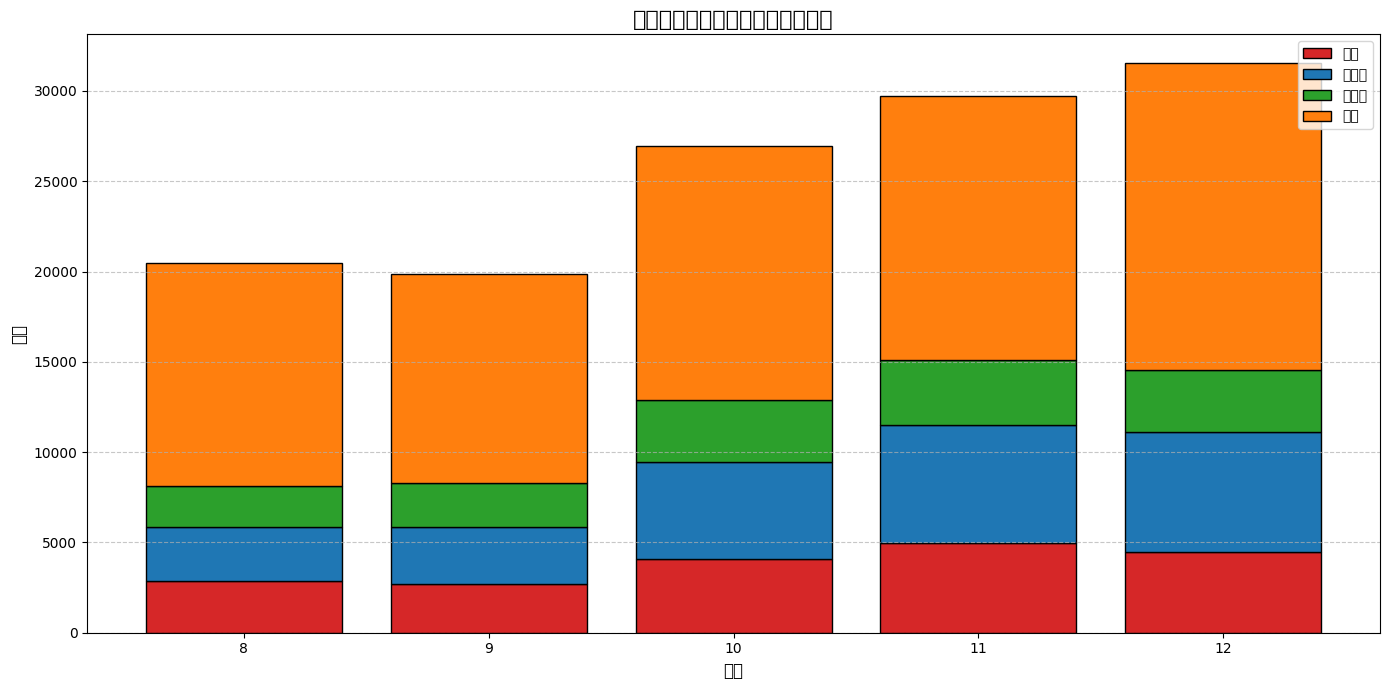

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
pj = pd.read_parquet('更换配件明细8-12.parquet')

# 筛选数据
pj = pj.query("`[产品名称].[产品型号]` == '产成品-吹风机'")

# 处理时间列
pj['创建时间_日期'] = pd.to_datetime(pj['创建时间']).dt.month

# 分类配件
pj['配件'] = np.where(
    pj['备件名称'].str.contains('发热丝'), '发热丝',
    np.where(
        pj['备件名称'].str.contains('电机'), '电机',
        np.where(
            pj['备件名称'].str.contains('控制板'), '控制板', '其他'
        )
    )
)

# 设置权重
pj['权重'] = np.where(
    pj['配件'] == '发热丝', 3,
    np.where(
        pj['配件'] == '电机', 2,
        np.where(
            pj['配件'] == '控制板', 4, 1
        )
    )
)

# 按权重排序并去重
pj_sort = pj.sort_values(by='权重', ascending=False)
pj = pj_sort.drop_duplicates(subset=['服务单号'], keep='first')

# 数据透视
data = pj[['创建时间_日期', '配件', '数量']].copy()
data = data.pivot_table(index='创建时间_日期', columns='配件', values='数量', aggfunc='sum')
x = data.reset_index()

# 定义颜色
colors = {
    '发热丝': '#1f77b4',  # 蓝色
    '电机': '#ff7f0e',    # 橙色
    '控制板': '#2ca02c',  # 绿色
    '其他': '#d62728'     # 红色
}

# 提取数据
months = x['创建时间_日期']  # 月份
categories = x.columns[1:]  # 配件类别
values = x[categories].values.T  # 配件数量（转置为堆叠顺序）

# 创建图表
fig, ax = plt.subplots(figsize=(14, 7))  # 设置图表大小

# 初始化底部值
bottom = np.zeros(len(months))

# 绘制堆叠柱状图
for i, category in enumerate(categories):
    ax.bar(
        months,  # x 轴数据
        values[i],  # y 轴数据
        bottom=bottom,  # 堆叠底部值
        label=category,  # 图例标签
        color=colors[category],  # 柱子颜色
        edgecolor='black',  # 柱子边框颜色
        linewidth=1  # 柱子边框宽度
    )
    bottom += values[i]  # 更新底部值

# 设置标题和标签
ax.set_title("寄修维修类型走势（柱状堆叠图）", fontsize=16)
ax.set_xlabel("月份", fontsize=12)
ax.set_ylabel("数量", fontsize=12)

# 设置 x 轴刻度
ax.set_xticks(months)
ax.set_xticklabels(months, fontsize=10)

# 设置 y 轴网格线
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()
